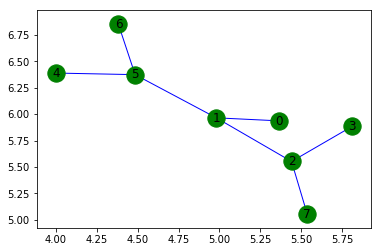

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)
max_value 0.0
max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]]
max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]]
max_value 0.0
Score: 0
Trained Q matrix:
[[nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan]
 [nan n

/Users/atul595525/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: RuntimeWarning: invalid value encountered in true_divide



max_value 531.2736
Score: 800.2808767459932
Trained Q matrix:
[[  0.          57.41276811   0.           0.           0.
    0.           0.           0.        ]
 [ 45.93021449   0.          71.76596014   0.           0.
   26.02049114   0.           0.        ]
 [  0.          57.41276811   0.          57.41276811   0.
    0.           0.          89.70745017]
 [  0.           0.          71.76596014   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   26.02049114   0.           0.        ]
 [  0.          57.41276811   0.           0.          20.81639291
    0.          20.81639291   0.        ]
 [  0.           0.           0.           0.           0.
   26.02049114   0.           0.        ]
 [  0.           0.          71.76596014   0.           0.
    0.           0.         100.        ]]
max_value 575.0188800000001
Score: 756.5156650160774
Trained Q matrix:
[[  0.          53.04502002   0.           0.    

    0.           0.         100.        ]]
max_value 235.52773324800006
Score: 889.5266598849626
Trained Q matrix:
[[  0.          61.65479441   0.           0.           0.
    0.           0.           0.        ]
 [ 41.81184886   0.          77.06849301   0.           0.
   41.81184886   0.           0.        ]
 [  0.          61.65479441   0.          52.26481108   0.
    0.           0.          96.33561626]
 [  0.           0.          77.06849301   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   41.81184886   0.           0.        ]
 [  0.          52.26481108   0.           0.          33.44947909
    0.          33.44947909   0.        ]
 [  0.           0.           0.           0.           0.
   41.81184886   0.           0.        ]
 [  0.           0.          77.06849301   0.           0.
    0.           0.         100.        ]]
max_value 434.1297492787201
Score: 898.9166432149452
Trained Q matri

Trained Q matrix:
[[  0.          63.44577653   0.           0.           0.
    0.           0.           0.        ]
 [ 50.75662123   0.          79.30722067   0.           0.
   50.75662123   0.           0.        ]
 [  0.          63.44577653   0.          63.44577653   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   50.75662123   0.           0.        ]
 [  0.          63.44577653   0.           0.          40.60529698
    0.          40.60529698   0.        ]
 [  0.           0.           0.           0.           0.
   50.75662123   0.           0.        ]
 [  0.           0.          80.           0.           0.
    0.           0.          99.89448387]]
max_value 597.4782562981477
Score: 977.9146688827498
Trained Q matrix:
[[  0.          63.44577653   0.           0.           0.
    0.           0.           0.   

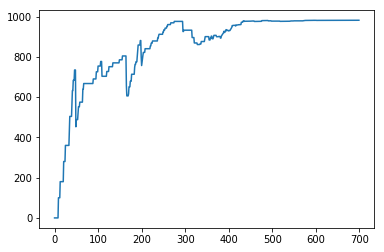

In [12]:
import numpy as np
import pylab as plt
import networkx as nx


# Initializing points
points_list = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7)]

goal = 7
mapping = {0: 'Start', 1: '1', 2: '2', 3: '3',
           4: '4', 5: '5', 6: '6', 7: '7-Destination'}
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G, k=.5, center=points_list[2])
nx.draw_networkx_nodes(G, pos, node_color='g')
nx.draw_networkx_edges(G, pos, edge_color='b')
nx.draw_networkx_labels(G, pos)
plt.show()


NO_OF_POINTS = 8

# Inititlaizing R Matrix
R = np.matrix(np.ones(shape=(NO_OF_POINTS, NO_OF_POINTS)))
R *= -1

for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 150
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 150
    else:
        # reverse of point
        R[point[::-1]] = 0


R[goal, goal] = 150
R


Q = np.matrix(np.zeros([NO_OF_POINTS, NO_OF_POINTS]))

# The learning parameter
gamma = 0.8

initial_state = 1


def available_actions(state):
    current_state_row = R[state, ]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act


available_act = available_actions(initial_state)


def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action


action = sample_next_action(available_act)


def update(current_state, action, gamma):
    max_index = (np.where(Q[action, ] == np.max(Q[action, ]))[1])
    if (max_index.shape[0] > 1):
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)

    max_value = Q[action, max_index]
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)


update(initial_state, action, gamma)


scores = []

for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state, action, gamma)
    scores.append(score)
    print('Score:', str(score))

    print("Trained Q matrix:")
    print(Q/np.max(Q)*100)

    # Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(
        Q[current_state, ] == np.max(Q[current_state, ]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index


print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()